<a href="https://colab.research.google.com/github/iesous-kurios/DS-Unit-1-Sprint-2-Data-Wrangling-and-Storytelling/blob/master/module4-sequence-your-narrative/GJW_LS_DS_124_Sequence_your_narrative_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

_Lambda School Data Science_

# Sequence Your Narrative - Assignment

Today we will create a sequence of visualizations inspired by [Hans Rosling's 200 Countries, 200 Years, 4 Minutes](https://www.youtube.com/watch?v=jbkSRLYSojo).

Using this [data from Gapminder](https://github.com/open-numbers/ddf--gapminder--systema_globalis/):
- [Income Per Person (GDP Per Capital, Inflation Adjusted) by Geo & Time](https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--income_per_person_gdppercapita_ppp_inflation_adjusted--by--geo--time.csv)
- [Life Expectancy (in Years) by Geo & Time](https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--life_expectancy_years--by--geo--time.csv)
- [Population Totals, by Geo & Time](https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--population_total--by--geo--time.csv)
- [Entities](https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--entities--geo--country.csv)
- [Concepts](https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--concepts.csv)

Objectives
- sequence multiple visualizations
- combine qualitative anecdotes with quantitative aggregates

Links
- [Hans Rosling’s TED talks](https://www.ted.com/speakers/hans_rosling)
- [Spiralling global temperatures from 1850-2016](https://twitter.com/ed_hawkins/status/729753441459945474)
- "[The Pudding](https://pudding.cool/) explains ideas debated in culture with visual essays."
- [A Data Point Walks Into a Bar](https://lisacharlotterost.github.io/2016/12/27/datapoint-in-bar/): a thoughtful blog post about emotion and empathy in data storytelling

# ASSIGNMENT
 

1.   Replicate the Lesson Code
2.   Take it further by using the same gapminder dataset to create a sequence of visualizations that combined tell a story of your choosing.

Get creative! Use text annotations to call out specific countries, maybe: change how the points are colored, change the opacity of the points, change their sized, pick a specific time window. Maybe only work with a subset of countries, change fonts, change background colors, etc. make it your own!

## Upgrade Seaborn



In [0]:
#!pip install --upgrade seaborn

In [2]:
import seaborn as sns
sns.__version__

'0.9.0'

## More imports

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

## Load & look at data

In [0]:
income = pd.read_csv('https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--income_per_person_gdppercapita_ppp_inflation_adjusted--by--geo--time.csv')

In [0]:
lifespan = pd.read_csv('https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--life_expectancy_years--by--geo--time.csv')

In [0]:
population = pd.read_csv('https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--population_total--by--geo--time.csv')

In [0]:
entities = pd.read_csv('https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--entities--geo--country.csv')

In [0]:
concepts = pd.read_csv('https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--concepts.csv')

In [9]:
income.shape, lifespan.shape, population.shape, entities.shape, concepts.shape

((46513, 3), (44370, 3), (59297, 3), (273, 33), (590, 16))

In [10]:
income.head()

,geo,time,income_per_person_gdppercapita_ppp_inflation_adjusted
0,afg,1800,603
1,afg,1801,603
2,afg,1802,603
3,afg,1803,603
4,afg,1804,603


In [11]:
income.sample(10)

,geo,time,income_per_person_gdppercapita_ppp_inflation_adjusted
38368,stp,1849,931
37460,smr,1905,2450
23959,lca,1900,1141
36917,sle,1844,826
24494,lso,1953,472
40664,tgo,1976,1774
5357,bol,1855,1193
7954,civ,1801,816
21751,khm,1861,963
39461,swe,1978,24806


In [12]:
lifespan.head()

,geo,time,life_expectancy_years
0,abw,1800,34.42
1,abw,1801,34.42
2,abw,1802,34.42
3,abw,1803,34.42
4,abw,1804,34.42


In [13]:
population.head()

,geo,time,population_total
0,afg,1800,3280000
1,afg,1801,3280000
2,afg,1802,3280000
3,afg,1803,3280000
4,afg,1804,3280000


In [14]:
pd.options.display.max_columns = 500
entities.head()

,country,alt_5,alternative_1,alternative_2,alternative_3,alternative_4_cdiac,arb1,arb2,arb3,arb4,arb5,arb6,g77_and_oecd_countries,gapminder_list,god_id,gwid,income_groups,is--country,iso3166_1_alpha2,iso3166_1_alpha3,iso3166_1_numeric,iso3166_2,landlocked,latitude,longitude,main_religion_2008,name,pandg,un_state,unicode_region_subtag,upper_case_name,world_4region,world_6region
0,abkh,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,others,Abkhazia,GE-AB,i0,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Abkhazia,NaN,False,NaN,NaN,europe,europe_central_asia
1,abw,NaN,NaN,NaN,NaN,Aruba,NaN,NaN,NaN,NaN,NaN,NaN,others,Aruba,AW,i12,high_income,True,AW,ABW,533.0,NaN,coastline,12.50000,-69.96667,christian,Aruba,NaN,False,AW,ARUBA,americas,america
2,afg,NaN,Islamic Republic of Afghanistan,NaN,NaN,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,g77,Afghanistan,AF,i1,low_income,True,AF,AFG,4.0,NaN,landlocked,33.00000,66.00000,muslim,Afghanistan,AFGHANISTAN,True,AF,AFGHANISTAN,asia,south_asia
3,ago,NaN,NaN,NaN,NaN,Angola,NaN,NaN,NaN,NaN,NaN,NaN,g77,Angola,AO,i7,upper_middle_income,True,AO,AGO,24.0,NaN,coastline,-12.50000,18.50000,christian,Angola,ANGOLA,True,AO,ANGOLA,africa,sub_saharan_africa
4,aia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,others,Anguilla,AI,i8,NaN,True,AI,AIA,660.0,NaN,coastline,18.21667,-63.05000,christian,Anguilla,NaN,False,AI,ANGUILLA,americas,america


In [15]:
concepts.head()

,concept,color,concept_type,description,description_long,domain,drill_up,indicator_url,name,name_catalog,name_short,scales,source,source_long,source_url,tags
0,adults_with_hiv_percent_age_15_49,NaN,measure,The estimated percentage of adults aged 15 to ...,NaN,NaN,NaN,NaN,"Adults with HIV (%, age 15-49)","Adults with HIV (%, age 15-49)",Adults with HIV,"[""log"", ""linear""]",NaN,NaN,https://www.gapminder.org/gapminder-world/docu...,hiv
1,age_at_1st_marriage_women,NaN,measure,"The mean age, in years, of first marriage for ...",NaN,NaN,NaN,NaN,Age at 1st marriage (women),Age at 1st marriage (women),Age at 1st marriage,"[""linear"", ""log""]",NaN,NaN,https://www.gapminder.org/data/documentation/g...,population
2,aged_15_24_employment_rate_percent,NaN,measure,"Percentage of total population, age group 15-2...",NaN,NaN,NaN,NaN,Aged 15-24 employment rate (%),Aged 15-24,Employment rate (%),"[""linear"", ""log""]",NaN,NaN,https://www.ilo.org/ilostat/,employment_rate
3,aged_15_24_unemployment_rate_percent,NaN,measure,"Percentage of total population, age group 15-2...",NaN,NaN,NaN,NaN,Aged 15-24 unemployment rate (%),Aged 15-24,Unemployment rate (%),"[""linear"", ""log""]",NaN,NaN,https://www.ilo.org/ilostat/,unemployment
4,aged_15_64_labour_force_participation_rate_per...,NaN,measure,"For age group 15-64, percentage of all labour ...",NaN,NaN,NaN,NaN,Aged 15-64 labour force participation rate (%),Aged 15-64,Labour force participation rate (%),"[""linear"", ""log""]",NaN,NaN,https://www.ilo.org/ilostat/,labour_force_participation


## Merging data: example

In [16]:
df_1 = pd.DataFrame({'Student': ['Peter', 'Zach', 'Jane'], 'Math Test Score': [75, 89, 82]})
df_1

,Student,Math Test Score
0,Peter,75
1,Zach,89
2,Jane,82


In [17]:
df_2 = pd.DataFrame({'Student': ['Alice', 'Peter', 'Jane'], 'Biology Test Score': [78, 87, 90]})
df_2

,Student,Biology Test Score
0,Alice,78
1,Peter,87
2,Jane,90


In [18]:
pd.merge(df_1, df_2, on='Student', how='right')

,Student,Math Test Score,Biology Test Score
0,Peter,75.0,87
1,Jane,82.0,90
2,Alice,NaN,78


In [19]:
df_3 = pd.DataFrame({'Name': ['Alice', 'Andrew', 'Jane'], 
                     'Chemistry Test Scores': ['A', 'B', 'C']})
df_3

,Name,Chemistry Test Scores
0,Alice,A
1,Andrew,B
2,Jane,C


In [20]:
df_4 = pd.merge(df_2, df_3, left_on='Student', right_on='Name').drop(columns=['Student'])
df_4

,Biology Test Score,Name,Chemistry Test Scores
0,78,Alice,A
1,90,Jane,C


In [21]:
df_4 = df_4[['Name', 'Biology Test Score', 'Chemistry Test Scores']]
df_4

,Name,Biology Test Score,Chemistry Test Scores
0,Alice,78,A
1,Jane,90,C


## Merge data

In [22]:
income.shape

(46513, 3)

In [23]:
lifespan.shape

(44370, 3)

In [24]:
df = pd.merge(income, lifespan)
df.shape

(40437, 4)

In [25]:
df = pd.merge(income, lifespan, on=['geo', 'time'], how='inner')
df.shape

(40437, 4)

In [26]:
df.head()

,geo,time,income_per_person_gdppercapita_ppp_inflation_adjusted,life_expectancy_years
0,afg,1800,603,28.21
1,afg,1801,603,28.20
2,afg,1802,603,28.19
3,afg,1803,603,28.18
4,afg,1804,603,28.17


In [27]:
df = pd.merge(df, population)
df.head()

,geo,time,income_per_person_gdppercapita_ppp_inflation_adjusted,life_expectancy_years,population_total
0,afg,1800,603,28.21,3280000
1,afg,1801,603,28.20,3280000
2,afg,1802,603,28.19,3280000
3,afg,1803,603,28.18,3280000
4,afg,1804,603,28.17,3280000


In [28]:
entities.head()

,country,alt_5,alternative_1,alternative_2,alternative_3,alternative_4_cdiac,arb1,arb2,arb3,arb4,arb5,arb6,g77_and_oecd_countries,gapminder_list,god_id,gwid,income_groups,is--country,iso3166_1_alpha2,iso3166_1_alpha3,iso3166_1_numeric,iso3166_2,landlocked,latitude,longitude,main_religion_2008,name,pandg,un_state,unicode_region_subtag,upper_case_name,world_4region,world_6region
0,abkh,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,others,Abkhazia,GE-AB,i0,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Abkhazia,NaN,False,NaN,NaN,europe,europe_central_asia
1,abw,NaN,NaN,NaN,NaN,Aruba,NaN,NaN,NaN,NaN,NaN,NaN,others,Aruba,AW,i12,high_income,True,AW,ABW,533.0,NaN,coastline,12.50000,-69.96667,christian,Aruba,NaN,False,AW,ARUBA,americas,america
2,afg,NaN,Islamic Republic of Afghanistan,NaN,NaN,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,g77,Afghanistan,AF,i1,low_income,True,AF,AFG,4.0,NaN,landlocked,33.00000,66.00000,muslim,Afghanistan,AFGHANISTAN,True,AF,AFGHANISTAN,asia,south_asia
3,ago,NaN,NaN,NaN,NaN,Angola,NaN,NaN,NaN,NaN,NaN,NaN,g77,Angola,AO,i7,upper_middle_income,True,AO,AGO,24.0,NaN,coastline,-12.50000,18.50000,christian,Angola,ANGOLA,True,AO,ANGOLA,africa,sub_saharan_africa
4,aia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,others,Anguilla,AI,i8,NaN,True,AI,AIA,660.0,NaN,coastline,18.21667,-63.05000,christian,Anguilla,NaN,False,AI,ANGUILLA,americas,america


In [29]:
subset_cols = ['country', 'name', 'world_4region', 'world_6region']
merged = pd.merge(df, entities[subset_cols], left_on='geo', right_on='country')
merged = merged.drop(columns=['geo'])
merged.head()

,time,income_per_person_gdppercapita_ppp_inflation_adjusted,life_expectancy_years,population_total,country,name,world_4region,world_6region
0,1800,603,28.21,3280000,afg,Afghanistan,asia,south_asia
1,1801,603,28.20,3280000,afg,Afghanistan,asia,south_asia
2,1802,603,28.19,3280000,afg,Afghanistan,asia,south_asia
3,1803,603,28.18,3280000,afg,Afghanistan,asia,south_asia
4,1804,603,28.17,3280000,afg,Afghanistan,asia,south_asia


In [30]:
mapping_1 = {
    'time': 'year',
    'country': 'country_code',
    'income_per_person_gdppercapita_ppp_inflation_adjusted': 'income',
    'population_total': 'population',
    'world_4region': '4region',
    'world_6region': '6region',
    'life_expectancy_years': 'lifespan'
}
mapping_2 = {'name': 'country'}
merged = merged.rename(columns=mapping_1)
merged = merged.rename(columns=mapping_2)
merged.head()

,year,income,lifespan,population,country_code,country,4region,6region
0,1800,603,28.21,3280000,afg,Afghanistan,asia,south_asia
1,1801,603,28.20,3280000,afg,Afghanistan,asia,south_asia
2,1802,603,28.19,3280000,afg,Afghanistan,asia,south_asia
3,1803,603,28.18,3280000,afg,Afghanistan,asia,south_asia
4,1804,603,28.17,3280000,afg,Afghanistan,asia,south_asia


## Explore data

In [31]:
merged.dtypes

year              int64
income            int64
lifespan        float64
population        int64
country_code     object
country          object
4region          object
6region          object
dtype: object

In [32]:
merged.describe()

,year,income,lifespan,population
count,40437.000000,40437.000000,40437.000000,4.043700e+04
mean,1909.292900,4619.492717,43.132080,1.371204e+07
std,63.308682,10209.571045,16.313228,6.606335e+07
min,1800.000000,247.000000,1.000000,2.128000e+03
25%,1854.000000,876.000000,31.160000,4.113310e+05
50%,1909.000000,1442.000000,35.500000,1.985952e+06
75%,1964.000000,3488.000000,55.970000,6.499707e+06
max,2018.000000,177522.000000,84.170000,1.415046e+09


In [33]:
merged.describe(exclude='number')

,country_code,country,4region,6region
count,40437,40437,40437,40437
unique,187,187,4,6
top,idn,Bahamas,africa,europe_central_asia
freq,219,219,11826,10778


In [34]:
merged['country'].value_counts()

Bahamas                           219
Nigeria                           219
India                             219
Cyprus                            219
Haiti                             219
Comoros                           219
Burkina Faso                      219
Italy                             219
Equatorial Guinea                 219
Cameroon                          219
Zambia                            219
Egypt                             219
Jordan                            219
Belarus                           219
Serbia                            219
Dominican Republic                219
Solomon Islands                   219
France                            219
Tanzania                          219
Zimbabwe                          219
Barbados                          219
Mexico                            219
Bosnia and Herzegovina            219
Norway                            219
Russia                            219
Fiji                              219
Morocco     

In [35]:
mask_usa = merged['country'] == 'United States'
usa = merged[mask_usa]
usa.head()

,year,income,lifespan,population,country_code,country,4region,6region
38028,1800,2127,39.41,6801854,usa,United States,americas,america
38029,1801,2167,39.41,6933517,usa,United States,americas,america
38030,1802,2202,39.41,7067728,usa,United States,americas,america
38031,1803,2166,39.41,7204538,usa,United States,americas,america
38032,1804,2165,39.41,7343995,usa,United States,americas,america


In [36]:
usa[usa['year'].isin([1818, 1918, 2018])]

,year,income,lifespan,population,country_code,country,4region,6region
38046,1818,2258,39.41,9879049,usa,United States,americas,america
38146,1918,9371,47.18,106721812,usa,United States,americas,america
38246,2018,54898,79.14,326766748,usa,United States,americas,america


In [37]:
mask_china = merged['country'] == 'China'
china = merged[mask_china]
china[china['year'].isin([1818, 1918, 2018])]

,year,income,lifespan,population,country_code,country,4region,6region
6854,1818,985,32.00,374161494,chn,China,asia,east_asia_pacific
6954,1918,989,22.13,462444535,chn,China,asia,east_asia_pacific
7054,2018,16018,76.92,1415045928,chn,China,asia,east_asia_pacific


## Plot visualization

In [38]:
import seaborn as sns

#now = merged[merged['year'].isin([2018])]
now = merged[merged['year'] == 2018]
now.head()

,year,income,lifespan,population,country_code,country,4region,6region
218,2018,1867,58.69,36373176,afg,Afghanistan,asia,south_asia
437,2018,5846,65.19,30774205,ago,Angola,africa,sub_saharan_africa
656,2018,12424,78.01,2934363,alb,Albania,europe,europe_central_asia
922,2018,68231,76.89,9541615,are,United Arab Emirates,asia,middle_east_north_africa
1141,2018,18942,76.97,44688864,arg,Argentina,americas,america


In [83]:
after1980 = merged[merged['year'] > 1979]
after1980.head()

,year,income,lifespan,population,country_code,country,4region,6region
180,1980,1168,43.26,13248370,afg,Afghanistan,asia,south_asia
181,1981,1295,44.06,13053954,afg,Afghanistan,asia,south_asia
182,1982,1414,43.75,12749645,afg,Afghanistan,asia,south_asia
183,1983,1467,42.02,12389269,afg,Afghanistan,asia,south_asia
184,1984,1443,39.77,12047115,afg,Afghanistan,asia,south_asia


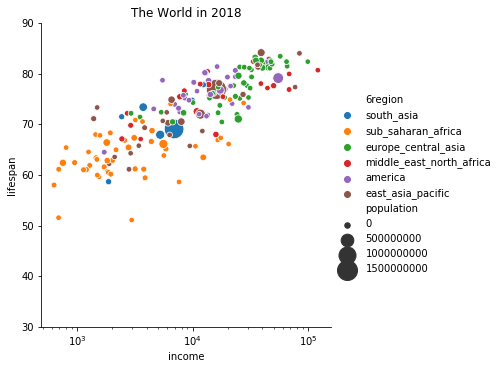

In [39]:
sns.relplot(x='income', 
            y='lifespan', 
            hue='6region',
            size='population',
            sizes=(30, 400),
            data=now);
plt.xscale('log')
plt.ylim([30, 90])
plt.title('The World in 2018');

## Analyze outliers

In [40]:
now.sort_values('income')

,year,income,lifespan,population,country_code,country,4region,6region
32771,2018,629,58.03,15181925,som,Somalia,africa,sub_saharan_africa
6178,2018,689,51.58,4737423,caf,Central African Republic,africa,sub_saharan_africa
2455,2018,691,61.14,11216450,bdi,Burundi,africa,sub_saharan_africa
7711,2018,751,62.42,84004989,cod,"Congo, Dem. Rep.",africa,sub_saharan_africa
20898,2018,801,65.43,4853516,lbr,Liberia,africa,sub_saharan_africa
26420,2018,949,62.45,22311375,ner,Niger,africa,sub_saharan_africa
25763,2018,1134,61.03,19164728,mwi,Malawi,africa,sub_saharan_africa
25106,2018,1196,61.07,30528673,moz,Mozambique,africa,sub_saharan_africa
11262,2018,1252,64.56,5187948,eri,Eritrea,africa,sub_saharan_africa
13890,2018,1282,61.90,13052608,gin,Guinea,africa,sub_saharan_africa


In [41]:
now.sort_values('income', ascending=False)

,year,income,lifespan,population,country_code,country,4region,6region
30362,2018,121033,80.71,2694849,qat,Qatar,asia,middle_east_north_africa
22212,2018,99034,82.39,590321,lux,Luxembourg,europe,europe_central_asia
31895,2018,83888,84.03,5791901,sgp,Singapore,asia,east_asia_pacific
5521,2018,76943,77.36,434076,brn,Brunei,asia,east_asia_pacific
20241,2018,68359,79.96,4197128,kwt,Kuwait,asia,middle_east_north_africa
922,2018,68231,76.89,9541615,are,United Arab Emirates,asia,middle_east_north_africa
16956,2018,65622,81.49,4803748,irl,Ireland,europe,europe_central_asia
27296,2018,64846,82.39,5353363,nor,Norway,europe,europe_central_asia
6616,2018,57133,83.45,8544034,che,Switzerland,europe,europe_central_asia
38246,2018,54898,79.14,326766748,usa,United States,americas,america


In [42]:
now.sort_values('lifespan', ascending=False)

,year,income,lifespan,population,country_code,country,4region,6region
18708,2018,39105,84.17,127185332,jpn,Japan,asia,east_asia_pacific
31895,2018,83888,84.03,5791901,sgp,Singapore,asia,east_asia_pacific
6616,2018,57133,83.45,8544034,che,Switzerland,europe,europe_central_asia
11481,2018,34742,83.23,46397452,esp,Spain,europe,europe_central_asia
1798,2018,45783,82.87,24772247,aus,Australia,asia,east_asia_pacific
12576,2018,39006,82.62,65233271,fra,France,europe,europe_central_asia
18051,2018,35192,82.62,59290969,ita,Italy,europe,europe_central_asia
17613,2018,47356,82.60,337780,isl,Iceland,europe,europe_central_asia
17832,2018,33434,82.41,8452841,isr,Israel,asia,middle_east_north_africa
27296,2018,64846,82.39,5353363,nor,Norway,europe,europe_central_asia


In [43]:
np.corrcoef(now['lifespan'], now['income'])

array([[1.        , 0.67035369],
       [0.67035369, 1.        ]])

In [44]:
df_1990 = merged[merged['year'] == 1990]
np.corrcoef(df_1990['lifespan'], df_1990['income'])[0][1]

0.5665901206189361

In [0]:
years = range(1980, 2019)
corr_list = []

for year in years:
  df_year = merged[merged['year'] == year]
  corr = np.corrcoef(df_year['lifespan'], df_year['income'])[0][1]
  corr_list.append(corr)
  
corr_arr = np.array(corr_list)

In [0]:
year_arr = np.array(years)

In [73]:
np.argmax(corr_arr)

38

In [74]:
year_arr[34]

2014

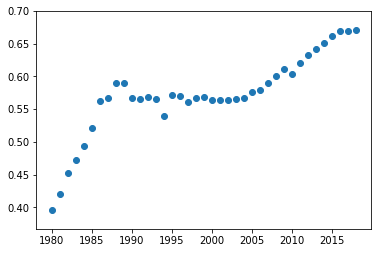

In [75]:
plt.scatter(year_arr, corr_arr);

In [76]:
now_qatar = now[now['country'] == 'Qatar']
now_qatar.head()

,year,income,lifespan,population,country_code,country,4region,6region
30362,2018,121033,80.71,2694849,qat,Qatar,asia,middle_east_north_africa


In [77]:
now_qatar['income'].values[0]

121033

Text(119033, 78.71, 'Qatar')

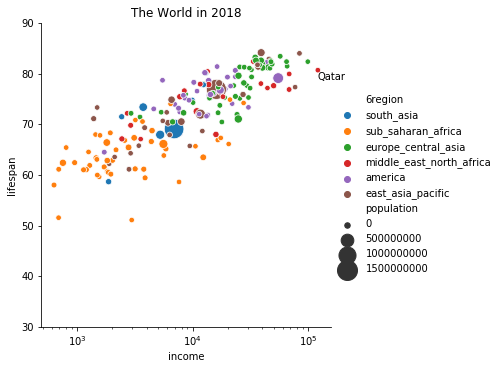

In [78]:
sns.relplot(x='income', 
            y='lifespan', 
            hue='6region', 
            size='population',
            sizes=(30, 400),
            data=now
           )
plt.xscale('log')
plt.ylim([30, 90])
plt.title('The World in 2018')
plt.text(x=now_qatar['income'].values[0]-2000, 
         y=now_qatar['lifespan'].values[0]-2, 
         s='Qatar')

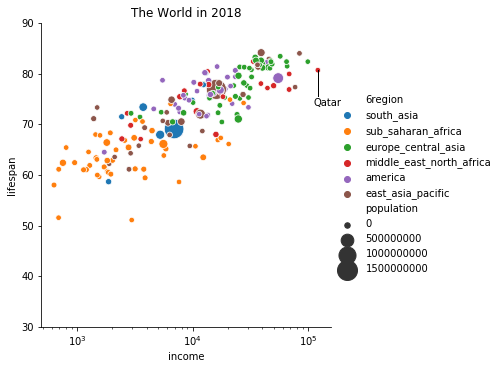

In [79]:
sns.relplot(x='income', 
            y='lifespan', 
            hue='6region', 
            size='population',
            sizes=(30, 400),
            data=now
           )
plt.xscale('log')
plt.ylim([30, 90])
plt.title('The World in 2018')
plt.text(x=now_qatar['income'].values[0]-10000, 
         y=now_qatar['lifespan'].values[0]-7, 
         s='Qatar')
plt.arrow(x=now_qatar['income'].values[0],
         y=now_qatar['lifespan'].values[0],
         dx=0,
         dy=-5
         )


## Plot multiple years

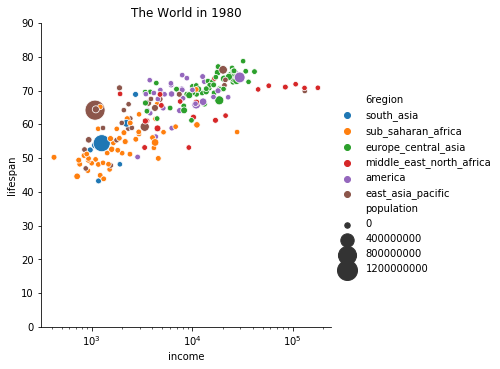

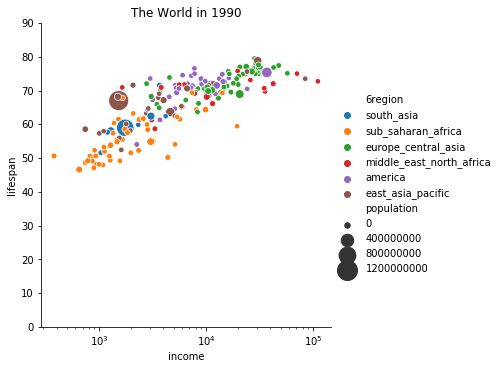

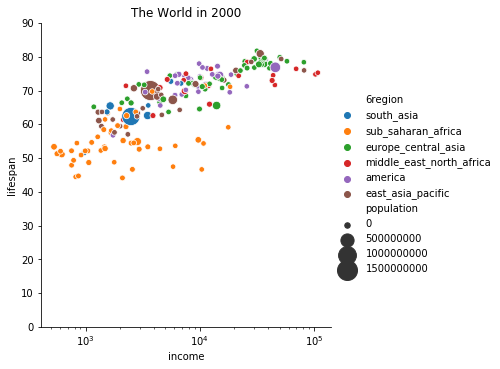

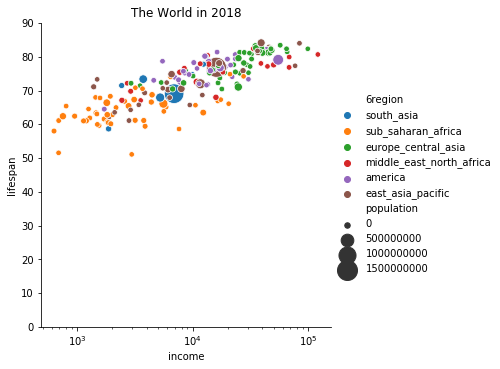

In [81]:
years = [1980, 1990, 2000, 2018]

for year in years:
  df_year = merged[merged['year']==year]
  sns.relplot(x='income', 
              y='lifespan', 
              hue='6region',
              size='population',
              sizes=(30, 400),
              data=df_year);
  plt.xscale('log')
  plt.ylim([0, 90])
  plt.title(f'The World in {year}')

## Point out a story

In [0]:
import plotly.express as px

In [88]:
px.scatter(after1980, 
           x='income', 
           y='lifespan',
           size='population',
           size_max=55,
           animation_frame='year',
           color='6region',
           log_x=True,
           hover_name='country'
          )

# STRETCH OPTIONS

## 1. Animate!

- [How to Create Animated Graphs in Python](https://towardsdatascience.com/how-to-create-animated-graphs-in-python-bb619cc2dec1)
- Try using [Plotly](https://plot.ly/python/animations/)!
- [The Ultimate Day of Chicago Bikeshare](https://chrisluedtke.github.io/divvy-data.html) (Lambda School Data Science student)
- [Using Phoebe for animations in Google Colab](https://colab.research.google.com/github/phoebe-project/phoebe2-docs/blob/2.1/tutorials/animations.ipynb)

## 2. Study for the Sprint Challenge

- Concatenate DataFrames
- Merge DataFrames
- Reshape data with `pivot_table()` and `.melt()`
- Be able to reproduce a FiveThirtyEight graph using Matplotlib or Seaborn.

## 3. Work on anything related to your portfolio site / Data Storytelling Project

In [89]:
after1980.head()

,year,income,lifespan,population,country_code,country,4region,6region
180,1980,1168,43.26,13248370,afg,Afghanistan,asia,south_asia
181,1981,1295,44.06,13053954,afg,Afghanistan,asia,south_asia
182,1982,1414,43.75,12749645,afg,Afghanistan,asia,south_asia
183,1983,1467,42.02,12389269,afg,Afghanistan,asia,south_asia
184,1984,1443,39.77,12047115,afg,Afghanistan,asia,south_asia


In [0]:
px.scatter(after1980, 
           x='income', 
           y='lifespan',
           size='population',
           size_max=55,
           animation_frame='year',
           color='6region',
           log_x=True,
           hover_name='country'
          )

In [90]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
from datetime import datetime

In [118]:
df['3.10 Enroll Date'].dtypes

dtype('O')

In [110]:
df['3.10 Enroll Date'].isnull().value_counts()

False    916
Name: 3.10 Enroll Date, dtype: int64

In [116]:
df['3.10 Enroll Date'] = df['3.10 Enroll Date'].tm_yday

AttributeError: ignored

In [0]:
for col in df.columns:
    if df[col].dtype == 'datetime64[ns]':
        df[col] = df[col].timetuple().tm_yday

In [113]:
px.scatter(df, 
           x='Age at Enrollment', 
           y='Days Enrolled in Project',
           size='Bed Nights (Housing Check-ins)',
           size_max=55,
           animation_frame='3.10 Enroll Date',
          )

KeyError: ignored

In [0]:
df = pd.read_excel('/content/drive/My Drive/FPS Weekly Data Colabs/YTD Data/newYTDaug14.xlsx')

In [95]:
df.head()

,Days Enrolled in Project,3.14 Household ID (Case ID),3.10 Enroll Date,3.11 Exit Date,3.12 Exit Destination,3.15 Relationship to HoH,3.16 Client Location,4.2 Income Total at Entry,4.2 Income Total at Exit,Age at Enrollment,Date of Last ES Stay (Beta),V5 Prior Address,V5 State,V5 Zip,2.2 Project Name,3.1 FirstName,5.1 Personal ID (Client ID),3.1 LastName,Bed Nights (Housing Check-ins)
0,2,104757,2018-08-20,2018-08-22,No exit interview completed,Son,NaN,NaN,NaN,4,2018-08-21,NaN,NaN,NaN,FPS--ES--Open Doors,Larrel,85848,Lewis,2
1,2,104757,2018-08-20,2018-08-22,No exit interview completed,Son,NaN,NaN,NaN,1,2018-08-21,NaN,NaN,NaN,FPS--ES--Open Doors,Kingsley,85849,Piapot,2
2,93,102203,2018-07-08,2018-10-09,"Rental by client, other (non-VASH) ongoing hou...",Self,NaN,NaN,NaN,24,2018-10-07,NaN,NaN,NaN,FPS--ES--Open Doors,Bernard,84762,Gaines,10
3,93,102203,2018-07-08,2018-10-09,"Rental by client, other (non-VASH) ongoing hou...",Daughter,NaN,NaN,NaN,7,2018-10-06,NaN,NaN,NaN,FPS--ES--Open Doors,Tylayiah,84763,Cheeks,9
4,93,102203,2018-07-08,2018-10-09,"Rental by client, other (non-VASH) ongoing hou...",Son,NaN,NaN,NaN,6,2018-10-07,NaN,NaN,NaN,FPS--ES--Open Doors,Tylen,84764,Cheeks,9
